# Multi label classification of UC Merced data set with multi-attention CNN-RNN model

In [1]:
# import modules
from aitlas.models import CNNRNN
from aitlas.datasets import UcMercedMultiLabelDataset
from aitlas.visualizations import display_image_labels

Instantiate a model object. Using the default, recommended settings should provide quite good performance. The first time this cell is run, Python will download a pretrained Resnet152 network (> 200 MB).

In [2]:
model = CNNRNN({
    "num_classes": 17 # there are 17 different classes in the example data set
})


/Users/spopov/Downloads/aitlas/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prepare the model (this loads the criterion, optimizer and the learning rate scheduler).

In [3]:
model.prepare()

Declare data sets. In this example, the data set has already been split into two directories: train and test.

In [6]:
# training set
train_set = UcMercedMultiLabelDataset({
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/Users/spopov/Downloads/UC_merced_multilabel/train",
    "csv_file": "/Users/spopov/Downloads/UC_merced_multilabel/train/multilabels.txt",
    "transforms": ["aitlas.transforms.ResizeCenterCropFlipHVToTensor"]
})

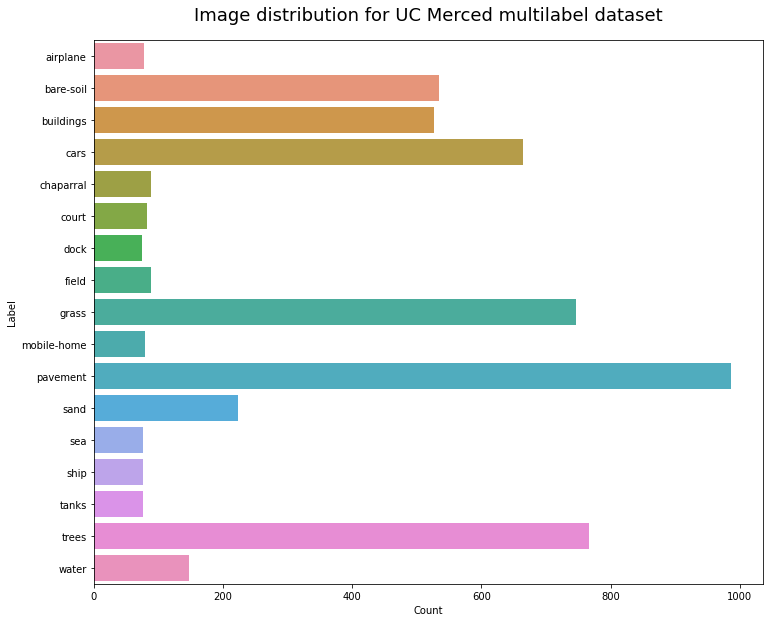

In [7]:
train_set.data_distribution_barchart();

In [8]:
# validation set
val_set = UcMercedMultiLabelDataset({
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/Users/spopov/Downloads/UC_merced_multilabel/test",
    "csv_file": "/Users/spopov/Downloads/UC_merced_multilabel/test/multilabels.txt",
    "transforms": ["aitlas.transforms.ResizeCenterCropFlipHVToTensor"]
})

/Users/spopov/Downloads/aitlas/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


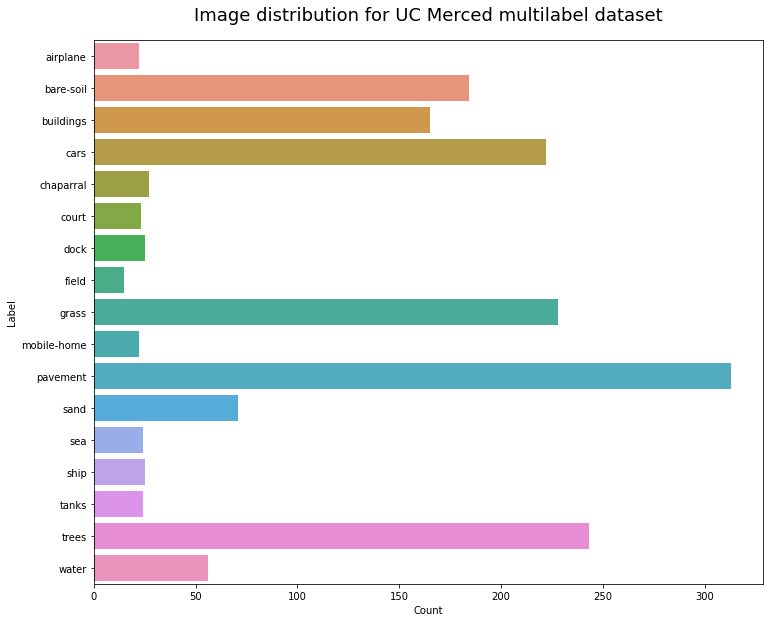

In [9]:
val_set.data_distribution_barchart();

We call `model.train_and_evaluate_model(...)` for only one epoch, to demonstrate usage. Increasing that number should result in better performance.

In [10]:
model.train_and_evaluate_model(
    train_dataset=train_set,
    val_dataset=val_set,
    epochs=1,
    model_directory="./",
    run_id="1",
    metrics=["f1_score"]
)

/Users/spopov/Downloads/aitlas/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-11-25 22:53:08,445 INFO Starting training.
training: 100%|██████████| 100/100 [10:37<00:00,  6.37s/it]
2021-11-25 23:03:45,526 INFO epoch: 1, time: 637, loss:  0.56936
testing on train set: 100%|██████████| 100/100 [10:18<00:00,  6.19s/it]
2021-11-25 23:14:04,617 INFO F1_score Micro:0.6867792077553067, F1_score Macro:0.4574388813563156, F1_score Weighted:0.6473861631428166, F1_score per Class:[0.         0.40428062 0.64146341 0.75434531 0.42477876 0.
 0.7107438  0.18556701 0.74416244 0.         0.88981869 0.57709251
 0.46464646 0.67241379 0.         0.70588235 0.60126582]
testing on validation set: 100%|█████

Run inference, then plot and save the results to disk.

running prediction: 100%|██████████| 32/32 [03:17<00:00,  6.17s/it]


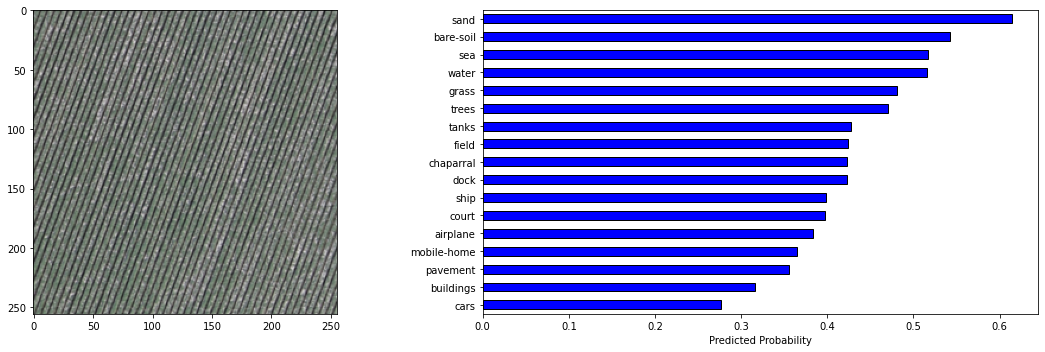

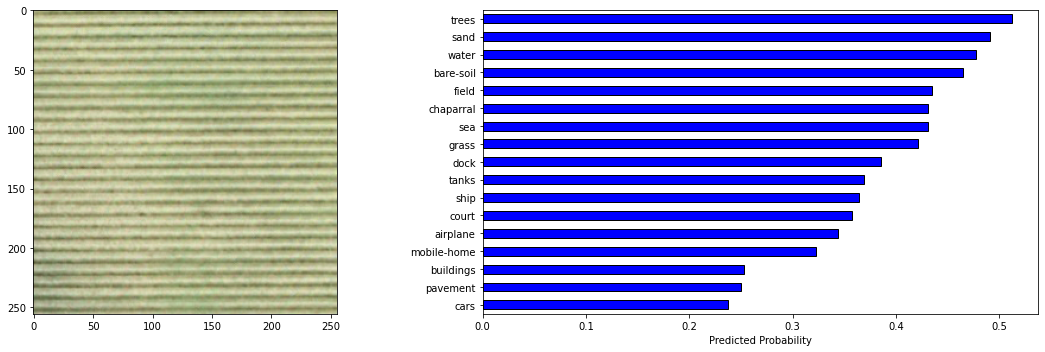

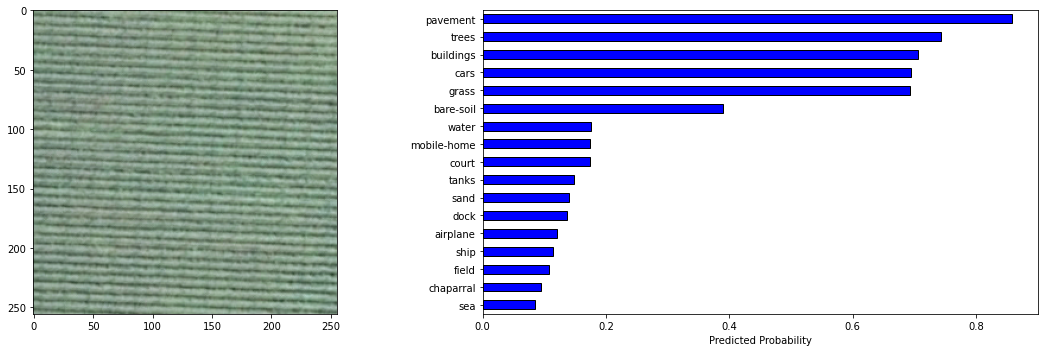

In [11]:
y_true, y_pred, y_prob = model.predict(dataset=val_set,)
NUM_IMAGES = 3
DISPLAYED = 0
# save and plot predictions for a sub-set of images (saves memory for the notebook)
for i, image_path in enumerate(val_set.data):
    if DISPLAYED < NUM_IMAGES:
        display_image_labels(
            image_path[0],
            y_true[i],
            y_pred[i],
            y_prob[i],
            val_set.labels,
            f"/Users/spopov/{i}_plot.png",
        )
        DISPLAYED += 1
    else:
        break